# 1.Bestimmung der Tonhoehe eines akustischen Signals

## Wir haben in unseren Datein, die Frequenz in Hz,

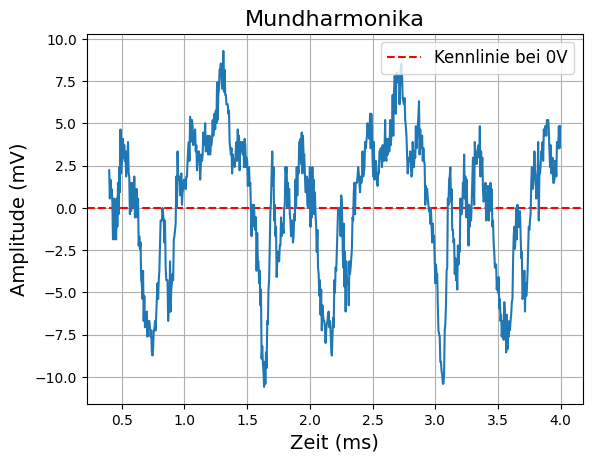

In [21]:
import numpy as np
import matplotlib.pyplot as plt


def encode(x):
    return x.replace(',', '.').encode()

file_path = 'mundharmonika.csv'
toene = np.genfromtxt((encode(x)
                     for x in open(file_path)),
                    delimiter=';', skip_header=3, usecols=())
#Hier wird zu allen Werten in der ersten Spalte ([:, 0]) der Variable toene der Wert 25.00769136 addiert
toene[:, 0]  = toene[:, 0] + 25.00769136

intervall = 5000
start = 80
ausgewaehlteZeit = toene[start:intervall, 0]
ausgewaehlteToene = toene[start:intervall, 1]


# Hinzufügen einer Kennlinie bei 0V
plt.axhline(0, color='red', linestyle='--', label='Kennlinie bei 0V')


plt.plot(toene[80:800,0 ], toene[80:800,1])
plt.grid(True)
plt.title('Mundharmonika', fontsize=16)
plt.xlabel('Zeit (ms)', fontsize=14)
plt.ylabel('Amplitude (mV)', fontsize=14)
plt.legend(fontsize=12, loc='upper right')

plt.show()


Wir bekommen eine Periodendauer von etwa 1,5ms durch das ablesen

Bestimmen Sie anhand des Plots die Grundperiode (in ms) und die Grundfrequenz (in Hz) des Signals. Wie
groß sind Signaldauer (in s), Abtastfrequenz (in Hz), Signallänge M (Anzahl der
Abtastzeitpunkte) und Abtastintervall ∆t (in s)?

In [12]:
# Der Kehrwert der Periodendauer ist die Frequenz f = 1/T des Signals. Folie 5-5
frequenz = 1.0 / 0.0015
print("Die Grundfrequenz beträgt: " + str(frequenz) + "Hz")

#Grundperiodendauer in ms
grundperiodendauer = 1.0 / frequenz
print("Die Grundperiodendauer beträgt: " + str(grundperiodendauer) + "s")

abtastfrequenz = 1.0 / (toene[1, 0] - toene[0, 0])
print("Die Abtastfrequenz beträgt: " + str(abtastfrequenz) + "Hz")

signaldauer = ausgewaehlteZeit[len(ausgewaehlteZeit)-1] - ausgewaehlteZeit[0] 
print("Die Signaldauer beträgt: " + str(signaldauer) + "ms")

#Die Signallaenge gibt die Anzahl der Abtastzeitpunkte an
signallaenge = len(ausgewaehlteZeit)
print("Die Signallänge beträgt: " + str(signallaenge) + " Abtastzeitpunkte")

abtastintervall = signaldauer / signallaenge
print("Das Abtastintervall beträgt: " + str(abtastintervall) + "ms")

Die Grundfrequenz beträgt: 666.6666666666666Hz
Die Grundperiodendauer beträgt: 0.0015s
Die Abtastfrequenz beträgt: 200.0000000000398Hz
Die Signaldauer beträgt: 24.59499938ms
Die Signallänge beträgt: 4920 Abtastzeitpunkte
Das Abtastintervall beträgt: 0.004998983613821138ms


Mithilfe der Funktion numpy.fft.fft() die Fouriertransformierte des
Signals darstellen.
Bestimmen Sie daraus das Amplitudenspektrum und stellen es ebenfalls
graphisch dar.
Achtung: die Frequenzachse des numerisch berechneten Spektrums ist
nicht in der Einheit Hertz angegeben, sondern in der Einheit Anzahl Schwingungen
innerhalb der gesamten Signaldauer, d.h. der n-te Eintrag im Spektrum f[n] entspricht n Schwingungen innerhalb der Gesamtlänge des Signals von
 M · ∆t s.
Die zugehörige Frequenz f in Hertz berechnet sich folglich aus f = n/(M · ∆t).
Stellen Sie mithilfe dieser Umrechnung das Amplitudenspektrum in Hertz dar.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


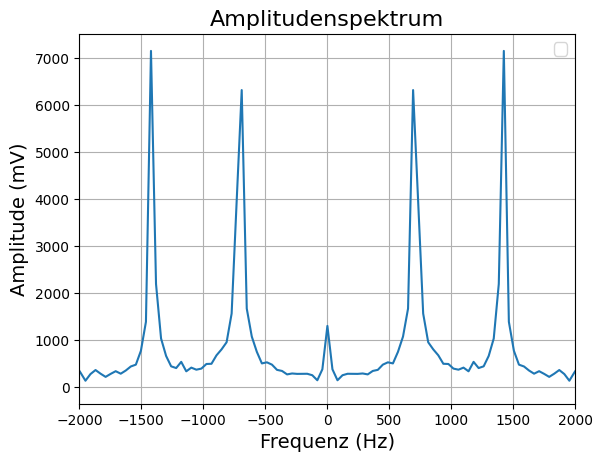

In [25]:
# Fouriertransformierte des Signals
fourier = np.fft.fftshift(np.fft.fft(ausgewaehlteToene))

# Amplitudenspektrum
amplitudenspektrum = np.abs(fourier)


M = len(ausgewaehlteZeit)
t = ausgewaehlteZeit[1]- ausgewaehlteZeit[0]
sampling_rate = 1000/t

# Frequenzachse
f = np.fft.fftshift(np.fft.fftfreq(len(ausgewaehlteZeit), 1/sampling_rate))

plt.plot(f, amplitudenspektrum)
plt.grid(True)
plt.title('Amplitudenspektrum', fontsize=16)
plt.xlabel('Frequenz (Hz)', fontsize=14)
plt.ylabel('Amplitude (mV)', fontsize=14)
plt.legend(fontsize=12, loc='upper right')
plt.xlim(-2000, 2000)

plt.show()




Identifizieren Sie die Grundfrequenz im Spektrum und berechnen Sie aus der gefundenen
Wellenzahl die Frequenz in Hz. Welche Amplitude hat diese Fourierkomponente?

In [ ]:
# Die Grundfrequenz ist die erste Fourierkomponente
grundfrequenz = frequenzachse[1]
print("Die Grundfrequenz beträgt: " + str(grundfrequenz) + "Hz")

# Die Amplitude der Grundfrequenz ist die erste Fourierkomponente
amplitude = amplitudenspektrum[1]
print("Die Amplitude der Grundfrequenz beträgt: " + str(amplitude) + "mV")


# 2. Frequenzgang von Lautsprechern

# 2.1. Amplituden- und Phasengang Lautsprecher klein

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

file_path = 'lautsprecher_klein.csv'
data = np.genfromtxt(file_path, delimiter=';', skip_header=3, usecols=())


# Split the data into separate arrays for each column
frequenz = data[:, 0]
amplitude = data[:, 1]
phase = data[:, 2]

# Plot the amplitude
plt.figure(figsize=(10, 5))
plt.plot(frequenz, amplitude, label='Amplitude')
plt.xlabel('Frequenz (Hz)')
plt.ylabel('Amplitude (mV)')
plt.title('Amplitudengang')
plt.legend()
plt.grid(True)
plt.show()


# Der Phasengang zeigt die Phasenverschiebung zwischen Eingangs- und Ausgangssignal in Abhängigkeit von der Frequenz
plt.figure(figsize=(10, 5))
plt.plot(frequenz, phase, label='Phase')
plt.xlabel('Frequenz (Hz)')
plt.ylabel('Phase (°)')
plt.title('Phasengang')
plt.legend()
plt.grid(True)
plt.show()

# Amplitudengang und Phasengang Lautsprecher groß

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

file_path = 'lautsprecher_gross.csv'
data = np.genfromtxt(file_path, delimiter=';', skip_header=3, usecols=())


# Split the data into separate arrays for each column
frequenz = data[:, 0]
amplitude = data[:, 1]
phase = data[:, 2]

# Plot the amplitude
plt.figure(figsize=(10, 5))
plt.plot(frequenz, amplitude, label='Amplitude')
plt.xlabel('Frequenz (Hz)')
plt.ylabel('Amplitude (mV)')
plt.title('Amplitudengang')
plt.legend()
plt.grid(True)
plt.show()

# Der Phasengang zeigt die Phasenverschiebung zwischen Eingangs- und Ausgangssignal in Abhängigkeit von der Frequenz
plt.figure(figsize=(10, 5))
plt.plot(frequenz, phase, label='Phase')
plt.xlabel('Frequenz (Hz)')
plt.ylabel('Phase (°)')
plt.title('Phasengang')
plt.legend()
plt.grid(True)
plt.show()

Erstellen Sie für beide Lautsprecher mithilfe von matplotlib ein Bode-Diagramm.
Stellen Sie dazu beide Diagramme mit der Funktion semilogx() halblogarithmisch
dar und berechnen Sie die zugehörigen Angaben in Dezibel nach der Formel aus der
Vorlesung und den Phasenwinkel nach der Formel:
phi = -delta_t * f * 360grad

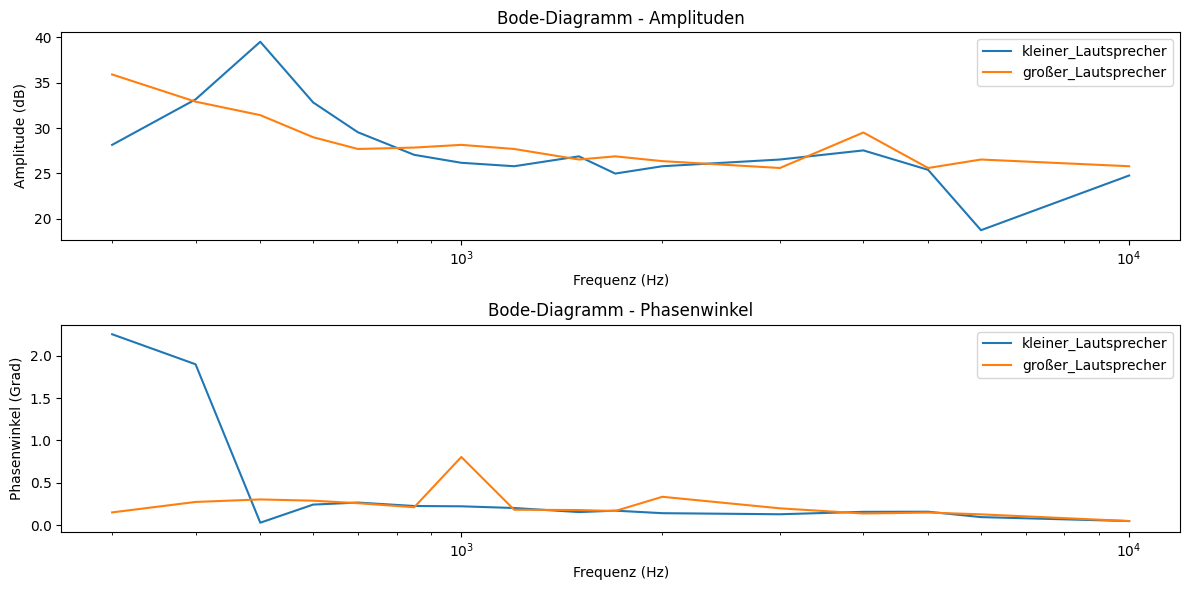

In [41]:
import numpy as np
import matplotlib.pyplot as plt

# KLEINER LAUTSPRECHER
file_path = 'lautsprecher_klein.csv'
data = np.genfromtxt(file_path, delimiter=';', skip_header=3, usecols=())

# Für jede Spalte der Daten eine eigene Variable erstellen
frequencies = data[:, 0] # Alle Frequenzen in Hz
amplitudes_speaker1 = data[:, 1] # Alle Amplituden in mV
phases_speaker1 = data[:, 2] # Alle Phasenwinkel in Grad

# GROSSER LAUTSPRECHER
file_path = 'lautsprecher_gross.csv'
data = np.genfromtxt(file_path, delimiter=';', skip_header=3, usecols=())


# Für jede Spalte der Daten eine eigene Variable erstellen
amplitudes_speaker2 = data[:, 1] # Alle Amplituden in mV
phases_speaker2 = data[:, 2] # Alle Phasenwinkel in Grad


# Bode-Diagramm erstellen
plt.figure(figsize=(12, 6))

# Amplitudenplot
plt.subplot(2, 1, 1)
plt.semilogx(frequencies, 20 * np.log10(amplitudes_speaker1), label='kleiner_Lautsprecher')
plt.semilogx(frequencies, 20 * np.log10(amplitudes_speaker2), label='großer_Lautsprecher')
plt.xlabel('Frequenz (Hz)')
plt.ylabel('Amplitude (dB)')
plt.title('Bode-Diagramm - Amplituden')
plt.legend()

# Phasenplot
plt.subplot(2, 1, 2)
plt.semilogx(frequencies, phases_speaker1, label='kleiner_Lautsprecher')
plt.semilogx(frequencies, phases_speaker2, label='großer_Lautsprecher')
plt.xlabel('Frequenz (Hz)')
plt.ylabel('Phasenwinkel (Grad)')
plt.title('Bode-Diagramm - Phasenwinkel')
plt.legend()

plt.tight_layout()
plt.show()
